## Importing the Data

We will start by importing the data and taking a look at the first few rows.

In [1]:

# Import the necessary libraries
import pandas as pd

# Define the file paths
subdirectory = "/workspaces/bakery_sales_prediction/sourcedata/pickle_data"
training_features_path = f"{subdirectory}/training_features.pkl"
validation_features_path = f"{subdirectory}/validation_features.pkl"
test_features_path = f"{subdirectory}/test_features.pkl"
training_labels_path = f"{subdirectory}/training_labels.pkl"
validation_labels_path = f"{subdirectory}/validation_labels.pkl"
test_labels_path = f"{subdirectory}/test_labels.pkl"

# Read the pickle files
training_features = pd.read_pickle(training_features_path)
validation_features = pd.read_pickle(validation_features_path)
test_features = pd.read_pickle(test_features_path)
training_labels = pd.read_pickle(training_labels_path)
validation_labels = pd.read_pickle(validation_labels_path)
test_labels = pd.read_pickle(test_labels_path)

# Verify the loaded data by printing their shapes and a few rows
print("Loaded Training features dimensions:", training_features.shape)
print("Loaded Validation features dimensions:", validation_features.shape)
print("Loaded Test features dimensions:", test_features.shape)
print()
print("Loaded Training labels dimensions:", training_labels.shape)
print("Loaded Validation labels dimensions:", validation_labels.shape)
print("Loaded Test labels dimensions:", test_labels.shape)
print()

print("First few rows of loaded training features:")
print(training_features.head())
print()
print("First few rows of loaded training labels:")
print(training_labels.head())


Loaded Training features dimensions: (4899, 42)
Loaded Validation features dimensions: (2099, 42)
Loaded Test features dimensions: (1, 42)

Loaded Training labels dimensions: (4899, 2)
Loaded Validation labels dimensions: (2099, 2)
Loaded Test labels dimensions: (1, 2)

First few rows of loaded training features:
   KielerWoche_1.0  Warengruppe_2.0  Warengruppe_3.0  Warengruppe_4.0  \
0                0                0                0                1   
1                0                0                0                0   
2                0                0                0                0   
3                0                0                1                0   
4                0                1                0                0   

   Warengruppe_5.0  Warengruppe_6.0  Feiertage_1.0  Ferientage_1.0  \
0                0                0              0               0   
1                1                0              0               0   
2                1                0 

In [2]:
# Convert DataFrames to numpy arrays
training_features_array = training_features.to_numpy()
training_labels_array = training_labels.to_numpy().flatten()  # Flatten in case labels are a DataFrame with one column

print("Training Features Array:")
print(training_features_array[:5])

Training Features Array:
[[ 0.      0.      0.      1.      0.      0.      0.      0.      0.
   0.      1.      0.      0.      0.      0.      1.      0.      0.
   0.      0.      0.      0.      0.      1.      0.      0.      0.
   0.      0.      0.      0.      0.      0.      0.      1.      1.
   0.      0.      4.     17.125  12.      1.4   ]
 [ 0.      0.      0.      0.      1.      0.      0.      0.      0.
   0.      0.      1.      0.      0.      0.      0.      0.      0.
   0.      0.      0.      0.      0.      0.      0.      0.      0.
   1.      0.      0.      0.      0.      1.      0.      0.      0.
   1.      0.      8.      5.9875 11.     10.6   ]
 [ 0.      0.      0.      0.      1.      0.      0.      0.      0.
   0.      1.      0.      0.      0.      0.      0.      1.      0.
   0.      0.      0.      0.      0.      0.      0.      0.      0.
   0.      0.      0.      0.      0.      0.      1.      0.      0.
   0.      1.      2.      1.75  

## Defining the Neural Network

Now, let's define our neural network. We are using a Sequential model definition from Keras with batch normalization and dense layers.

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, BatchNormalization
from tensorflow.keras.optimizers import Adam

model = Sequential([
  InputLayer(input_shape=(training_features.shape[1], )),
  BatchNormalization(),
  Dense(10, activation='relu'),
  #Dropout(0.3),
  Dense(4, activation='relu'),
  Dense(1)
])

model.summary()


2024-06-13 17:36:25.284947: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-06-13 17:36:26.213850: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-06-13 17:36:28.276180: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-13 17:36:31.417408: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
/home/codespace/.python/current/lib/python3.10/site-packages/keras/src/layers/core/input_layer.py:25: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ batch_normalization             │ (None, 42)             │           168 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │           430 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │            44 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 647 (2.53 KB)

 Trainable params: 563 (2.20 KB)

 Non-trainable params: 84 (336.00 B)

## Compiling and Training the Model

We will compile the model using Mean Squared Error (MSE) as the loss function and Adam optimizer. The model is then trained using the training data.

In [5]:
model.compile(loss="mse", optimizer=Adam(learning_rate=0.001))

history = model.fit(training_features, training_labels, epochs=10,
                    validation_data=(validation_features, validation_labels))

Epoch 1/10


154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 29028.1973 - val_loss: 22014.2539
Epoch 2/10
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 16736.3926 - val_loss: 19234.6602
Epoch 3/10
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 14977.4736 - val_loss: 17529.0684
Epoch 4/10
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 13442.4180 - val_loss: 16011.7256
Epoch 5/10
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 12004.5801 - val_loss: 14521.8301
Epoch 6/10
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 10147.6211 - val_loss: 13223.2920
Epoch 7/10
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 10734.6279 - val_loss: 12051.5869
Epoch 8/10
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 8337.3223 - val_loss: 11123.0684
Epoch 9/10
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7590.8462 - val_loss: 10260.8477
Epoch 10/10
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7725.3379 - val_loss: 9503.0586


## Saving the Trained Model

After training, it's a good practice to save the model for future use.

In [6]:
model.save("python_model2.h5")

## Plotting Training History

Visualizing the training and validation loss can help us understand the model's performance over time.

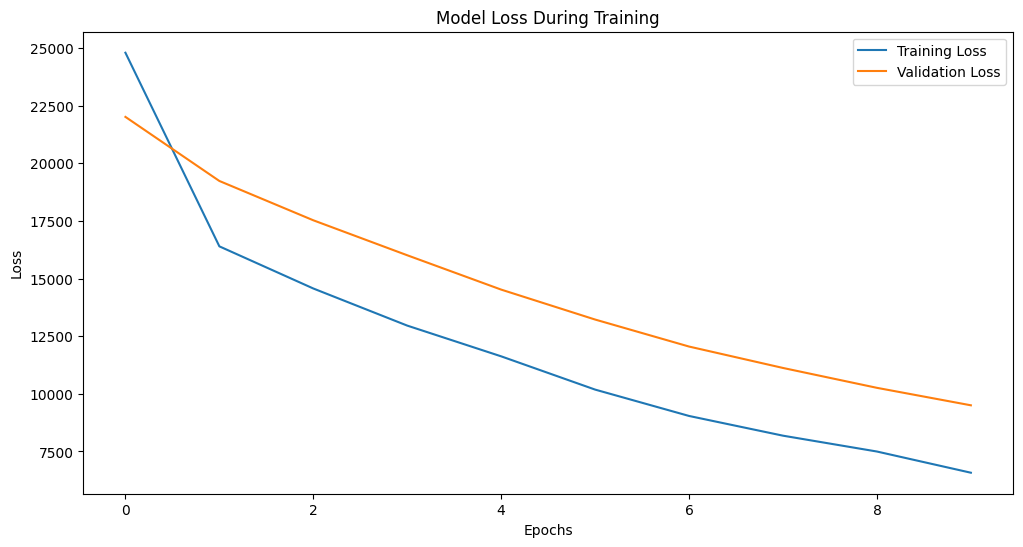

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss During Training')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


## Making Predictions and Evaluating the Model

Let's use the model to make predictions on our training and validation sets and evaluate the model's performance using Mean Absolute Percentage Error (MAPE).

In [12]:
# error occurs, something about the shape. but when flattened, an error persists at next step. could not find out how to solve it.
# my thoughts where that y_true and y_pred are of different shapes because they have different sizes?

import numpy as np

def mape(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    #y_true, y_pred = np.array(y_true).flatten(), np.array(y_pred).flatten() # flatten regelt den error auch nicht
    print(y_true.shape, y_pred.shape)
    non_zero_mask = y_true != 0
    print(non_zero_mask.shape)
    return np.mean(np.abs((y_true[non_zero_mask] - y_pred[non_zero_mask]) / y_true[non_zero_mask])) * 100

training_predictions = model.predict(training_features)
validation_predictions = model.predict(validation_features)
print(f"MAPE on the Training Data: {mape(training_labels, training_predictions):.2f}%")
print(f"MAPE on the Validation Data: {mape(validation_labels, validation_predictions):.2f}%")


154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 667us/step


66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 863us/step
(4899, 2) (4899, 1)
(4899, 2)


IndexError: boolean index did not match indexed array along dimension 1; dimension is 1 but corresponding boolean dimension is 2

In [ ]:
#original
import numpy as np

def mape(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    non_zero_mask = y_true != 0
    return np.mean(np.abs((y_true[non_zero_mask] - y_pred[non_zero_mask]) / y_true[non_zero_mask])) * 100

training_predictions = model.predict(training_features)
validation_predictions = model.predict(validation_features)
print(f"MAPE on the Training Data: {mape(training_labels, training_predictions):.2f}%")
print(f"MAPE on the Validation Data: {mape(validation_labels, validation_predictions):.2f}%")


154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 913us/step
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 721us/step


IndexError: boolean index did not match indexed array along dimension 1; dimension is 1 but corresponding boolean dimension is 2

## Visualizing Predictions vs Actual Values

Visualizing the predicted versus actual values can provide insights into the model's accuracy.

In [13]:
def plot_predictions(data, title):
    plt.figure(figsize=(12, 6))
    plt.plot(data['actual'], label='Actual Values', color='red')
    plt.plot(data['prediction'], label='Predicted Values', color='blue')
    plt.title(title)
    plt.xlabel('Case Number')
    plt.ylabel('Price in 1.000 USD')
    plt.legend()
    plt.show()

# Ensure that training_predictions, validation_predictions, training_labels, and validation_labels are numpy arrays
training_predictions = np.array(training_predictions).flatten()
validation_predictions = np.array(validation_predictions).flatten()
training_labels = np.array(training_labels).flatten()
validation_labels = np.array(validation_labels).flatten()

# print the type of the predictions
print(type(training_predictions))
print(type(validation_predictions))

# Create DataFrames with 1-dimensional arrays
data_train = pd.DataFrame({'prediction': training_predictions, 'actual': training_labels})
data_validation = pd.DataFrame({'prediction': validation_predictions, 'actual': validation_labels})

# Plot predictions
plot_predictions(data_train.head(100), 'Predicted and Actual Values for the Training Data')
plot_predictions(data_validation.head(100), 'Predicted and Actual Values for the Validation Data')

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


ValueError: All arrays must be of the same length